In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from pathlib import Path
import warnings
from skimage.feature import hog
import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [ ]:
#Connecting the driver
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
root = '/content/drive/MyDrive/ML/dataset'
#style_file = 'styles.csv'
image_folder_train = root + '/train/'
image_folder_train_o =image_folder_train + 'O'
image_folder_train_r =image_folder_train + 'R'

image_folder_test_r = root + '/train/'

image_folder_test = root + '/test/'
print(image_folder_train)

path_1= root+"/train_common/"

/content/drive/MyDrive/ML/dataset/train/


In [ ]:
df_train= pd.DataFrame(columns=['id','masterCategory'])

for folder in os.listdir(image_folder_train):
    if folder != '.DS_Store':
        folder_path =os.path.join(image_folder_train,folder)
        print(folder_path)
        temp_df=pd.DataFrame(columns=['id','masterCategory'])
        img_list=[]
        for img in os.listdir(folder_path):
            img_list.append(img)
        #print(folder)
        temp_df['id'] =img_list
        temp_df['masterCategory']= folder
        #print(temp_df)
        df_train = pd.concat([df_train, temp_df], ignore_index=True)
df_train

/content/drive/MyDrive/ML/dataset/train/R
/content/drive/MyDrive/ML/dataset/train/O


,id,masterCategory
0,R_9224.jpg,R
1,R_9619.jpg,R
2,R_9484.jpg,R
3,R_922.jpg,R
4,R_9968.jpg,R
...,...,...
22559,O_10336.jpg,O
22560,O_10464.jpg,O
22561,O_10308.jpg,O
22562,O_1042.jpg,O


In [ ]:
df_test= pd.DataFrame(columns=['id','masterCategory'])

for folder in os.listdir(image_folder_train):
    if folder != '.DS_Store':
        folder_path =os.path.join(image_folder_test,folder)
        print(folder_path)
        temp_df=pd.DataFrame(columns=['id','masterCategory'])
        img_list=[]
        for img in os.listdir(folder_path):
            img_list.append(img)
        #print(folder)
        temp_df['id'] =img_list
        temp_df['masterCategory']= folder
        #print(temp_df)
        df_test = pd.concat([df_test, temp_df], ignore_index=True)
df_train

/content/drive/MyDrive/ML/dataset/test/R
/content/drive/MyDrive/ML/dataset/test/O


,id,masterCategory
0,R_9224.jpg,R
1,R_9619.jpg,R
2,R_9484.jpg,R
3,R_922.jpg,R
4,R_9968.jpg,R
...,...,...
22559,O_10336.jpg,O
22560,O_10464.jpg,O
22561,O_10308.jpg,O
22562,O_1042.jpg,O


In [ ]:
# Images

all_images = []
#labels = []

def load_image(ids,path=path_1):
    #print(ids)
    img = cv.imread(path+ids,cv.IMREAD_GRAYSCALE) #load at gray scale
    #img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #convert to gray scale
    return img,ids


In [ ]:
for ids in tqdm(list(df_train.id)):
    #print(ids)
    if os.path.exists(path_1+ids):
        img,ids = load_image(ids)
        #print(img)
        if img is not None:
            all_images.append([img,ids])
    #labels.append(ids)
len(all_images)

100%|██████████| 22564/22564 [00:03<00:00, 6374.68it/s]


102

In [ ]:
def resize_image(img,ids):
    return cv.resize(img, (60, 80),interpolation =cv.INTER_LINEAR)

all_images_resized = [[resize_image(x,y),y] for x,y in all_images]
len(all_images_resized)

102

In [ ]:
df_labels = pd.DataFrame(all_images_resized,columns=['image','id'])

In [ ]:
target = 'masterCategory'

#df_train_1 = df_train[df_train[target].isin(categories)][['id',target]]
print(df_train)
df_labels = pd.merge(df_labels,df_train,how='left',on=['id'])
df_labels = df_labels.fillna('Others')
df_labels['class'] = pd.factorize(df_labels[target])[0]
print("Data Shape: ", str(df_labels.shape))
print(df_labels[target].value_counts())

                id masterCategory
0       R_9224.jpg              R
1       R_9619.jpg              R
2       R_9484.jpg              R
3        R_922.jpg              R
4       R_9968.jpg              R
...            ...            ...
22559  O_10336.jpg              O
22560  O_10464.jpg              O
22561  O_10308.jpg              O
22562   O_1042.jpg              O
22563  O_10371.jpg              O

[22564 rows x 2 columns]
Data Shape:  (102, 4)
R    85
O    17
Name: masterCategory, dtype: int64


(80, 60)
Total Keypoints with nonmaxSuppression: 9


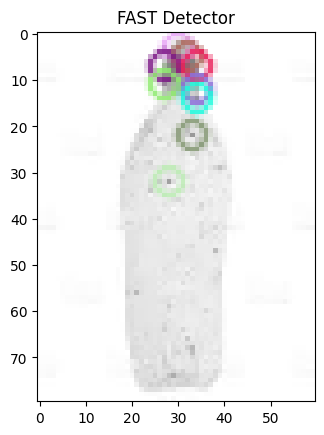

(80, 60)
Total Keypoints with nonmaxSuppression: 46


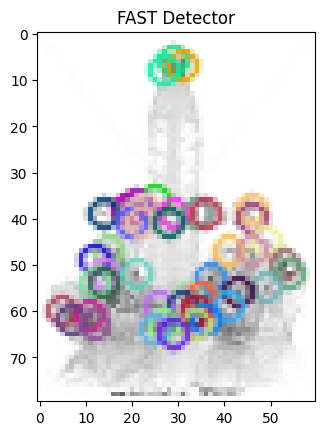

(80, 60)
Total Keypoints with nonmaxSuppression: 54


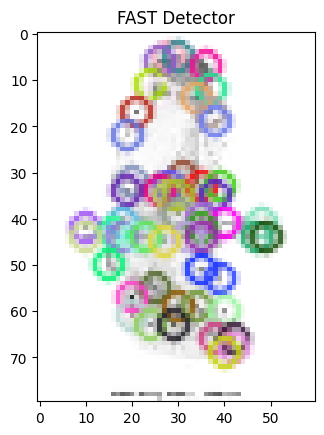

(80, 60)
Total Keypoints with nonmaxSuppression: 44


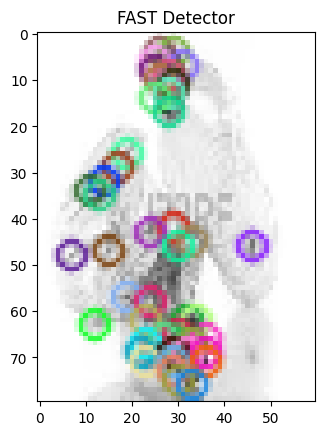

(80, 60)
Total Keypoints with nonmaxSuppression: 14


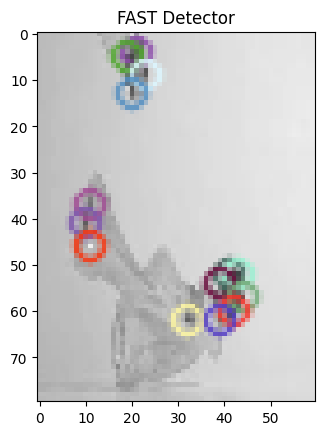

(80, 60)
Total Keypoints with nonmaxSuppression: 13


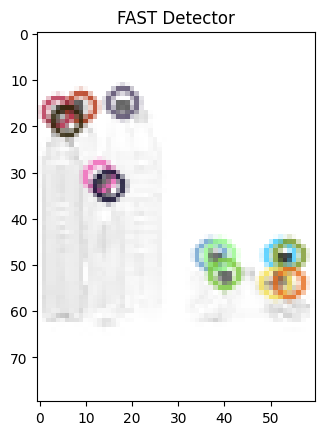

(80, 60)
Total Keypoints with nonmaxSuppression: 12


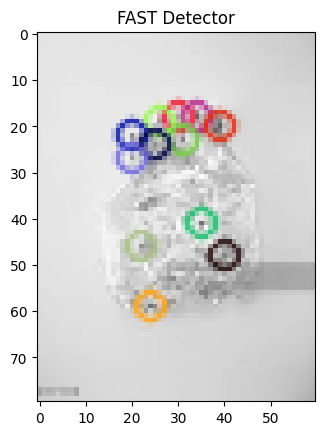

(80, 60)
Total Keypoints with nonmaxSuppression: 6


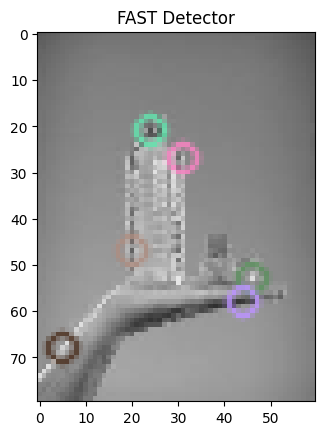

(80, 60)
Total Keypoints with nonmaxSuppression: 16


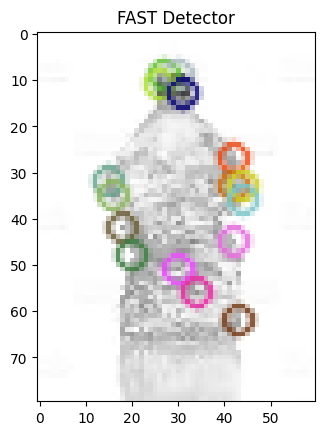

(80, 60)
Total Keypoints with nonmaxSuppression: 10


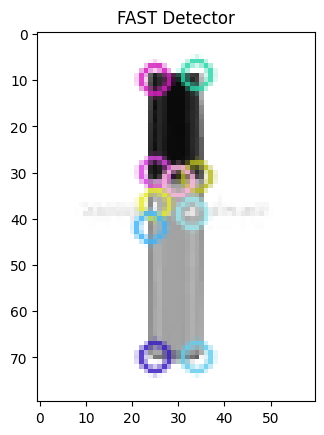

(80, 60)
Total Keypoints with nonmaxSuppression: 54


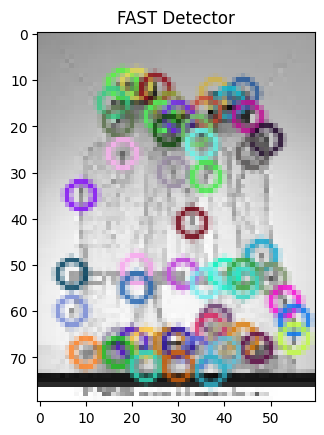

(80, 60)
Total Keypoints with nonmaxSuppression: 42


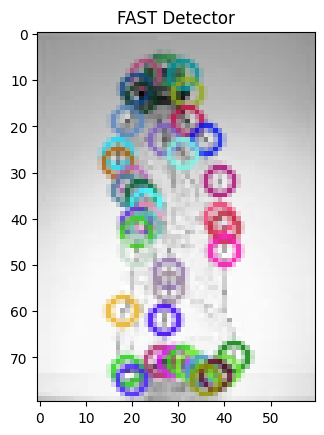

(80, 60)
Total Keypoints with nonmaxSuppression: 50


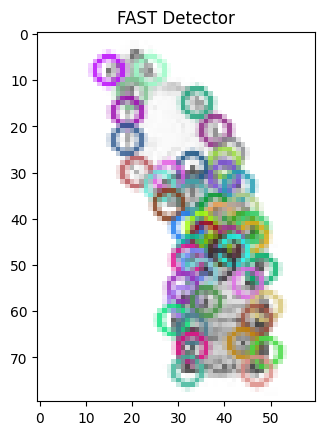

(80, 60)
Total Keypoints with nonmaxSuppression: 15


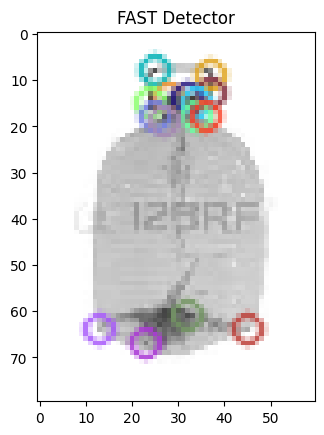

(80, 60)
Total Keypoints with nonmaxSuppression: 9


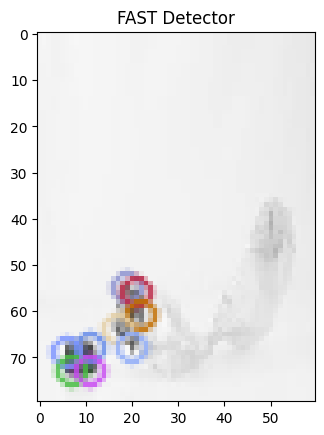

(80, 60)
Total Keypoints with nonmaxSuppression: 14


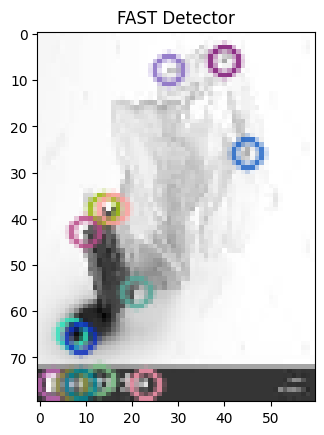

(80, 60)
Total Keypoints with nonmaxSuppression: 30


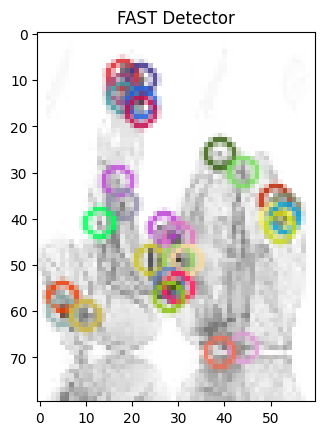

(80, 60)
Total Keypoints with nonmaxSuppression: 27


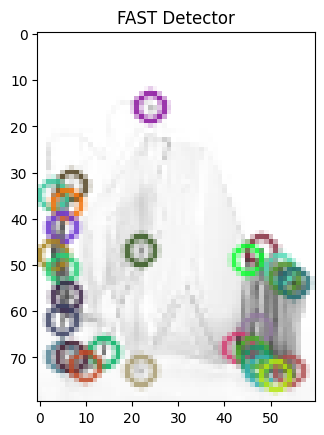

(80, 60)
Total Keypoints with nonmaxSuppression: 4


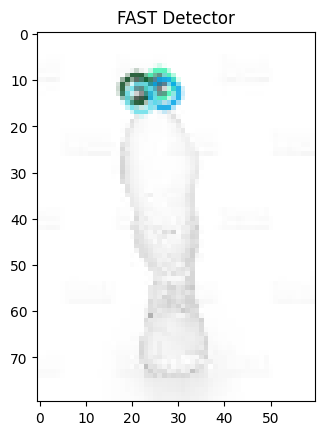

(80, 60)
Total Keypoints with nonmaxSuppression: 15


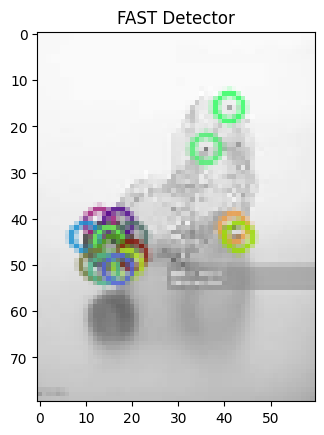

In [ ]:
#FAST detected Features¶
for image in df_labels.image[:20]:
    print(image.shape)
    plt.imshow(image)
    fast = cv.FastFeatureDetector_create(50)
    kp = fast.detect(image,None)
    img2 = cv.drawKeypoints(image, kp, None, color=(255,0,0))
    # Print all default params
    #print( "Threshold: {}".format(fast.getThreshold()) )
    #print( "neighborhood: {}".format(fast.getType()) )
    print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)))
    fast_image=cv.drawKeypoints(image,kp,image)
    plt.imshow(fast_image);plt.title('FAST Detector')
    plt.show()

In [ ]:
train_images = np.stack(df_labels.image.values,axis=0)
n_samples = len(train_images)
data_images = train_images.reshape((n_samples, -1))

In [ ]:

ppcr = 8
ppcc = 8
hog_images = []
hog_features = []
for image in tqdm(train_images):
    blur = cv.GaussianBlur(image,(5,5),0)
    fd,hog_image = hog(blur, orientations=8, pixels_per_cell=(ppcr,ppcc),cells_per_block=(2,2),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
hog_features = np.array(hog_features)
hog_features.shape

100%|██████████| 102/102 [00:00<00:00, 111.16it/s]


(102, 1728)

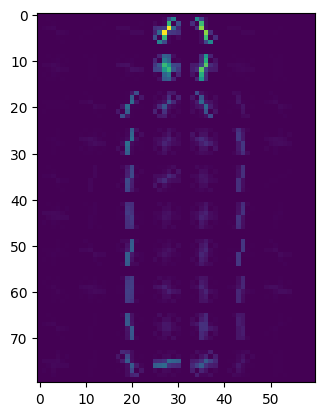

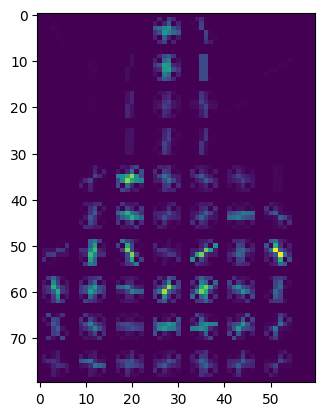

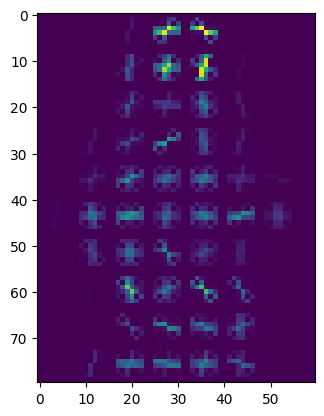

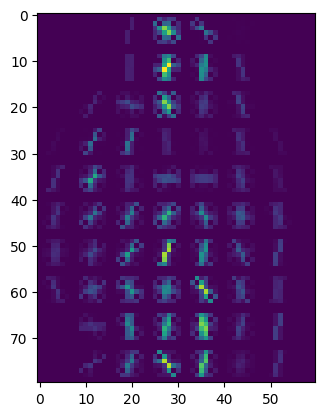

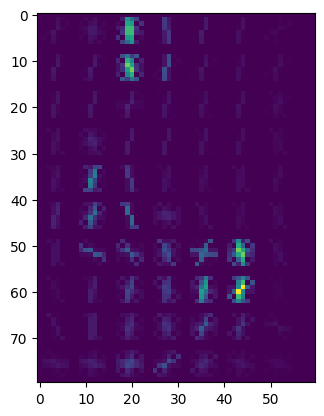

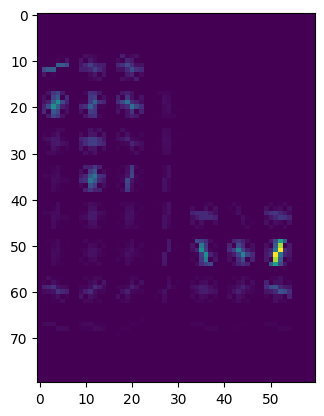

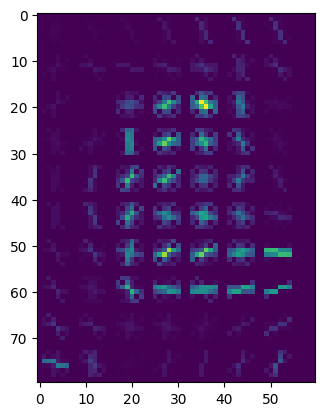

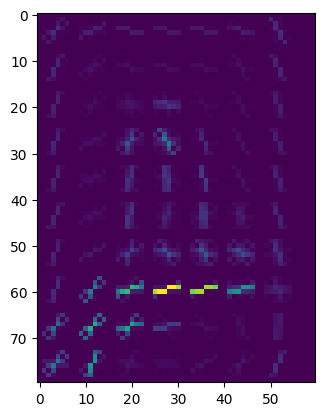

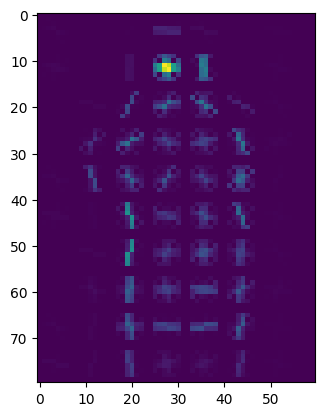

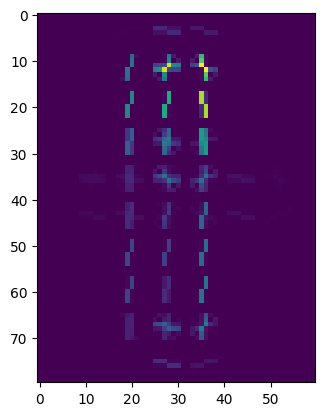

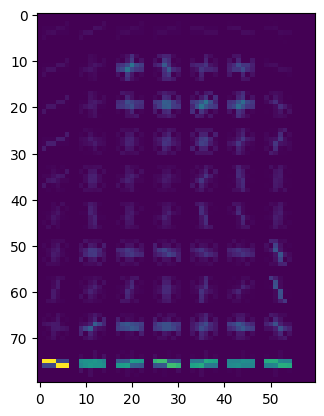

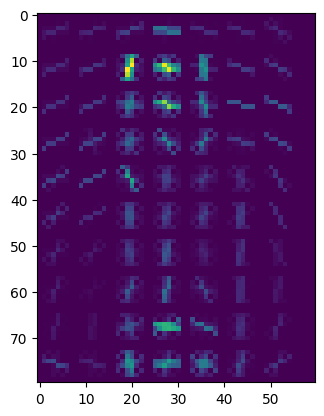

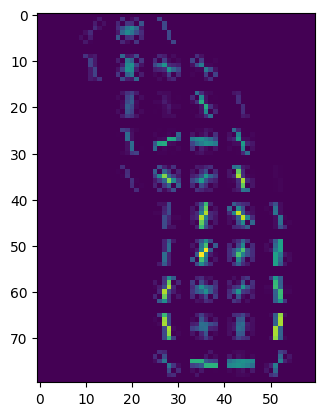

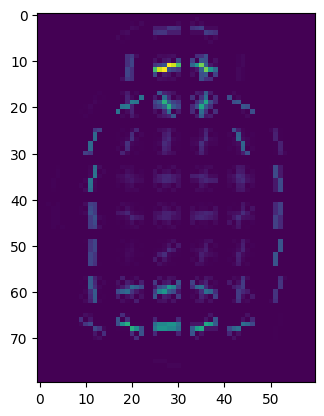

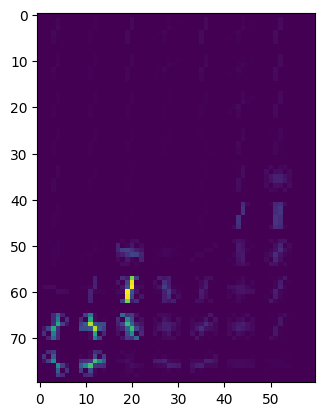

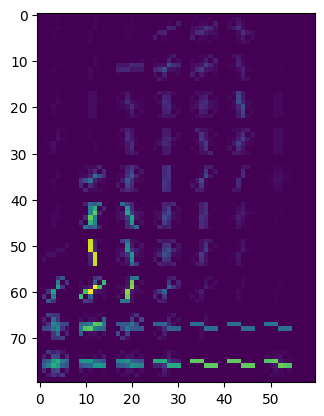

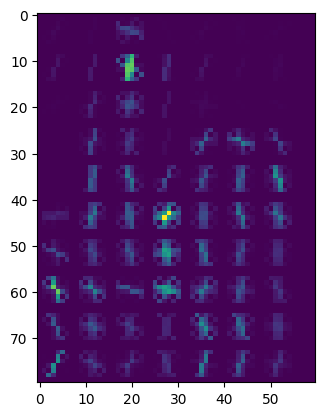

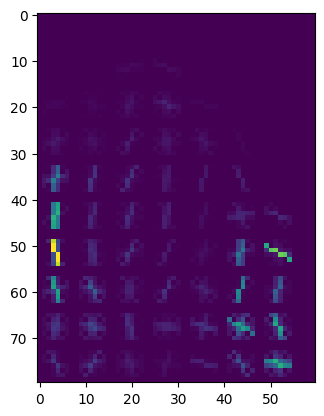

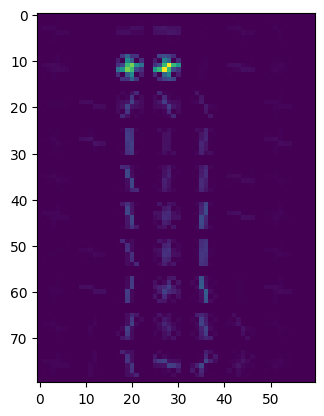

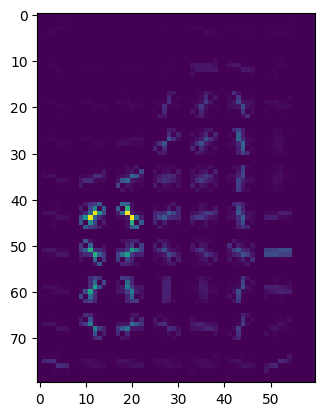

In [ ]:
for img in hog_images[:20]:
    plt.imshow(img)
    plt.show()

In [ ]:
train_images.shape

(102, 80, 60)

In [ ]:
edges = [cv.Canny(image,50,150,apertureSize = 3) for image in train_images]
edges = np.array(edges)
n_samples_edges = len(edges)
print(n_samples_edges)
edge_images = edges.reshape((n_samples, -1))
edge_images.shape

102


(102, 4800)

In [ ]:
train_images.shape, hog_features.shape, edge_images.shape


((102, 80, 60), (102, 1728), (102, 4800))

In [ ]:
edge_hog = np.hstack([hog_features,edge_images])
edge_hog.shape

(102, 6528)

In [ ]:
histr = [cv.calcHist([img],[0],None,[256],[0,256]) for img in train_images]
histr = np.array(histr)
n_samples_histr = len(histr)
image_hist = histr.reshape((n_samples_histr, -1))
image_hist.shape

(102, 256)

In [ ]:
edge_hog = np.hstack([hog_features,edge_images,image_hist])
edge_hog.shape

(102, 6784)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hog_features,df_labels['class'],test_size=0.2,stratify=df_labels['class'])
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(81, 1728), (81,)
Test data and target sizes: 
(21, 1728), (21,)


In [ ]:
y_train.value_counts(),y_test.value_counts()

(0    67
 1    14
 Name: class, dtype: int64,
 0    18
 1     3
 Name: class, dtype: int64)

In [ ]:
#KNN
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier

test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

classifier = KNeighborsClassifier(n_neighbors=3,algorithm='brute')
classifier.fit(X_scaled, y_train)
test_accuracy = classifier.score(scaler.transform(X_test), y_test)
print(test_accuracy)

0.9047619047619048


In [ ]:
#Logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

test_accuracy = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

classifier = LogisticRegression(max_iter=20)
classifier.fit(X_scaled, y_train)
test_accuracy = classifier.score(scaler.transform(X_test), y_test)
print(test_accuracy)
